## Курсовая работа

In [95]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import datasets, svm, metrics
plt.rcParams['figure.figsize'] = (14.0, 6.0)

**Dataset Information:**

 The dataset consists of 10 numerical and 8 categorical attributes. 
 
 The 'Revenue' attribute will be used as the class label. 

 "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

 The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
 
 The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
 
 The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
 
 The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
 
 The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

 The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



**Reading the Dataset**

In [141]:
# reading the dataset
data = pd.read_csv('online_shoppers_intention.csv')
# checking the shape of the data
data.shape

(12330, 18)

## Some Analysis to Understand the Data

In [142]:
# checking the head of the data

data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [143]:
# describing the data

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [144]:
# checking the percentage of missing data contains in all the columns

missing_percentage = data.isnull().sum()/data.shape[0]
print('the percentage of missing data contains in all the columns:')
print()
print(missing_percentage)

the percentage of missing data contains in all the columns:

Administrative             0.001135
Administrative_Duration    0.001135
Informational              0.001135
Informational_Duration     0.001135
ProductRelated             0.001135
ProductRelated_Duration    0.001135
BounceRates                0.001135
ExitRates                  0.001135
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64


Процент пропущенных значений небольшой, поэтому мы можем просто удалить строки с пропущенными значениями.

In [145]:
data=data.dropna()
data.shape

(12316, 18)

In [146]:
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


--------
**To better understand the dataset, here's the descriptions of each column:**

Administrative: Number of Administrative Pages viewed by an online visitor;  
Administrative_Duration: Seconds of Time of Administrative Pages viewed by an online visitor;  
Informational: Number of Informational Pages viewed by an online visitor;  
Informational_Duration: Seconds of Time of Informational Pages viewed by an online visitor;  
ProductRelated: Number of Product Related Pages viewed by an online visitor;  
ProductRelated_Duration: Seconds of Time of Product Related Pages viewed by an online visitor;  
BounceRates: Percentage of the visitor exiting pages without triggering any additional tasks;  
ExitRates: Percentage of pageviews the visitor ended at;  
PageValues: Average Page Value calculated by the visitor purchase transaction value divide all pageviews;  
SpecialDay: Closeness of the pageviewing day to a special day or holiday;  
Month: Month of the pageviewing;  
OperatingSystems: Operating system which an online visitor uses for pageviewing;  
Browser: Browser which an online visitor uses for pageviewing;  
Region: Geographic region where an online visitor locates;  
TrafficType: Traffic category of an online visitor belongs to;  
VisitorType: Visitor categorized in New Visitor, Returning Visitor, or Other;  
Weekend: Whether or not an online visitor visits on weekend;  
Revenue: Whether or not an online visitor completes the purchase

## Data Visualization

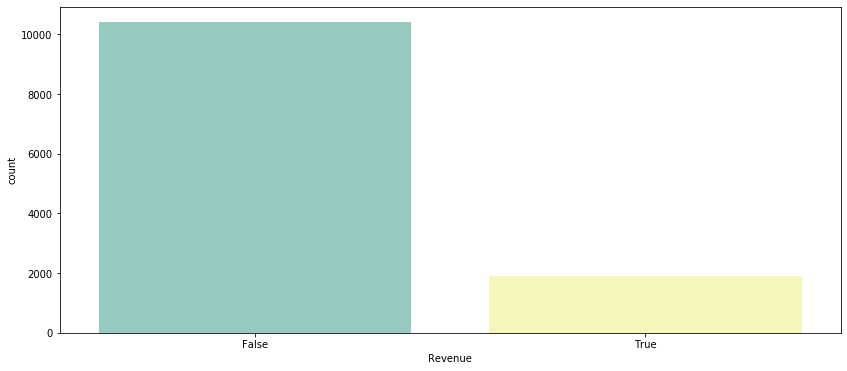

In [102]:
sns.countplot(data['Revenue'], palette='Set3')

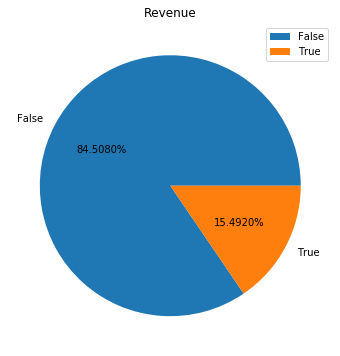

In [103]:
#pie chart for revenue
labels = ['False', 'True']
plt.title("Revenue")
plt.pie(data.Revenue.value_counts(), labels = labels, autopct = '%.4f%%')
plt.legend()

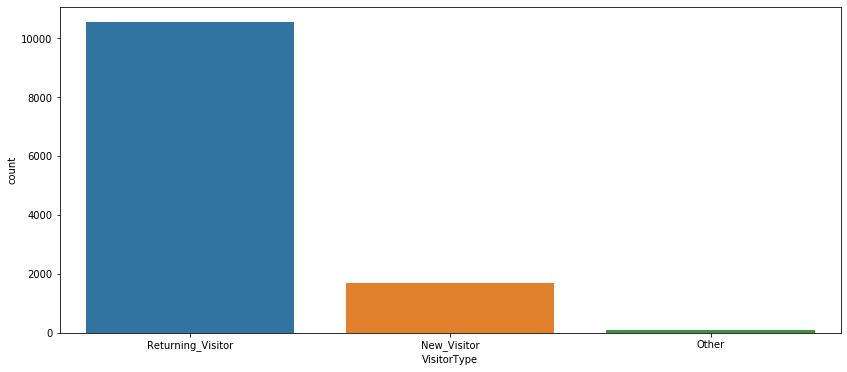

In [104]:
#different users
sns.countplot(x = data.VisitorType)

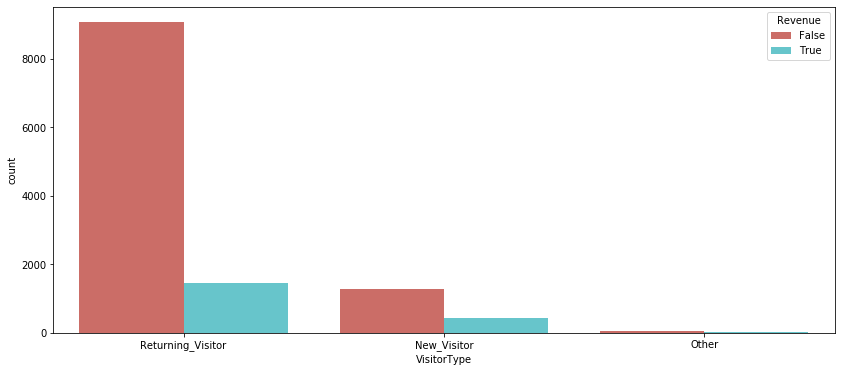

In [105]:
sns.countplot(data["VisitorType"],hue=data["Revenue"],palette="hls")

Text(0.5, 1.0, 'Purchase on Weekends')

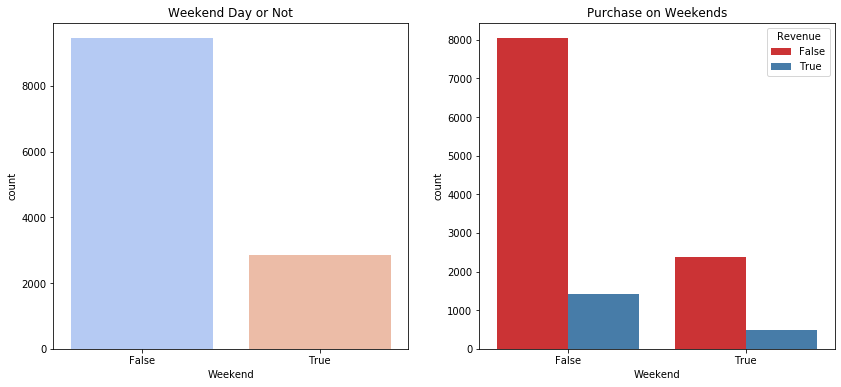

In [106]:
plt.subplot(1,2,1)
sns.countplot(data["Weekend"],palette="coolwarm");
plt.title('Weekend Day or Not')
plt.subplot(1,2,2)
sns.countplot(data["Weekend"],hue=data["Revenue"],palette="Set1");
plt.title('Purchase on Weekends')

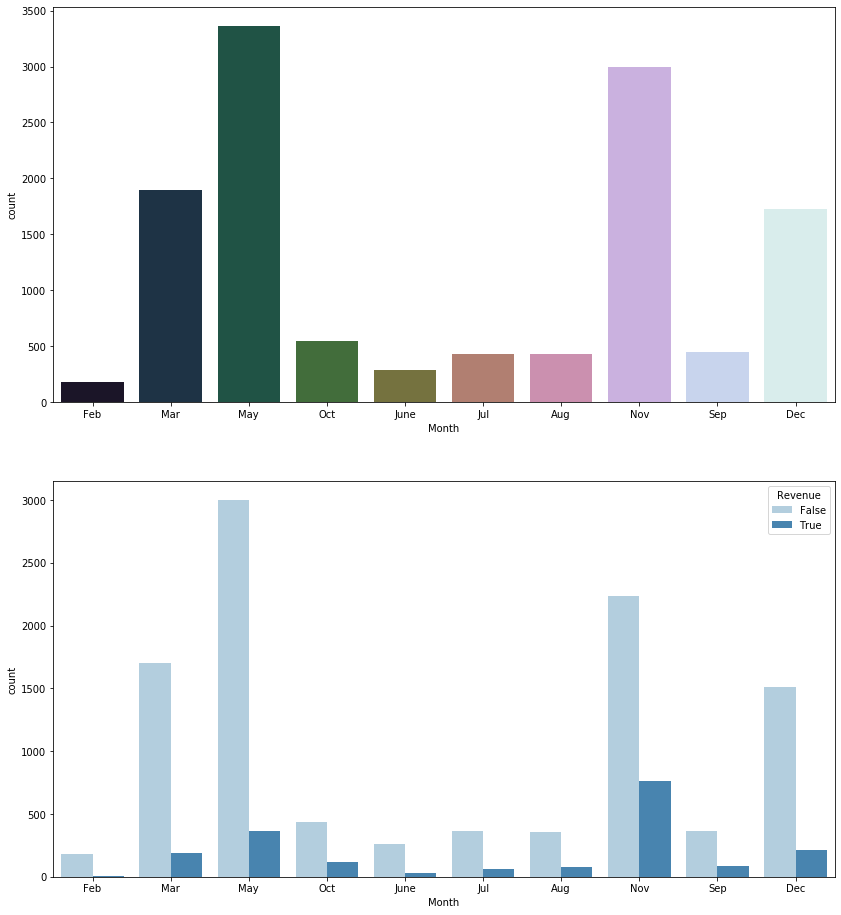

In [107]:
f,ax=plt.subplots(2,1,figsize=(14,16))
sns.countplot(data["Month"],palette="cubehelix",ax=ax[0]);

sns.countplot(data["Month"],hue=data["Revenue"],palette="Blues",ax=ax[1]);


Text(0.5, 1.0, 'Special day destribution')

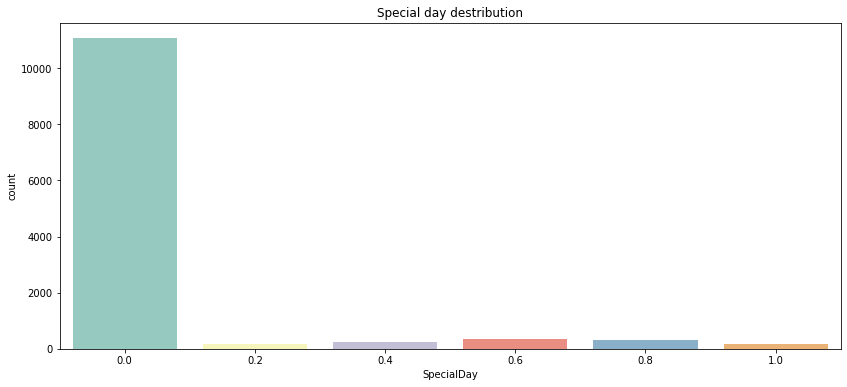

In [108]:

sns.countplot(data['SpecialDay'], palette='Set3')
plt.title('Special day destribution')


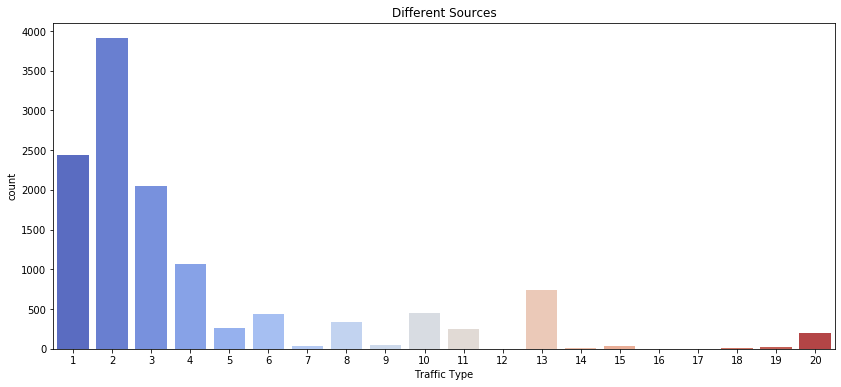

In [109]:
# Distribution of customers based on Traffic Type
sns.countplot(data['TrafficType'],palette='coolwarm')
plt.title('Different Sources')
plt.xlabel('Traffic Type')
plt.ylabel('count');

Traffic Source 2 is the best advertising source for the website. Should consider other sources and decide whether it is needed or not

Text(0, 0.5, 'count')

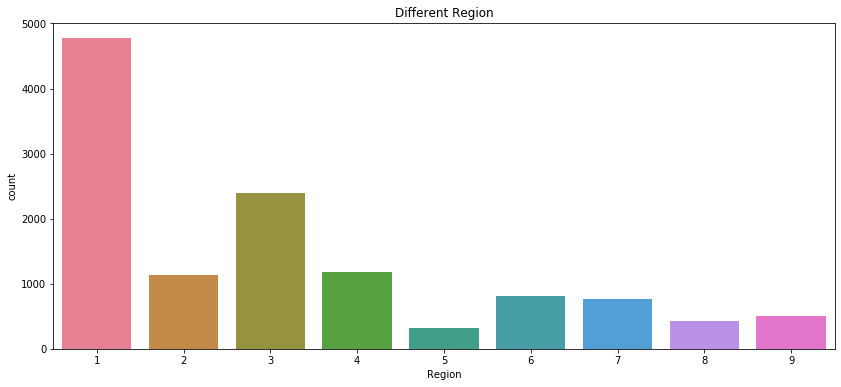

In [110]:
# Distribution of customers based on Region
sns.countplot(data['Region'],palette='husl')
plt.title('Different Region')
plt.xlabel('Region')
plt.ylabel('count')

The website is common among region 1 customers. Should give promotions in other regions to improve sales

## Масштабирование данных

In [147]:
scale_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',\
             'ProductRelated_Duration','BounceRates','ExitRates','PageValues']

In [148]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [149]:
data_scale=pd.DataFrame()
for i in range(len(scale_cols)):
    col = scale_cols[i]    
    data_scale[col] = sc1_data[:,i]

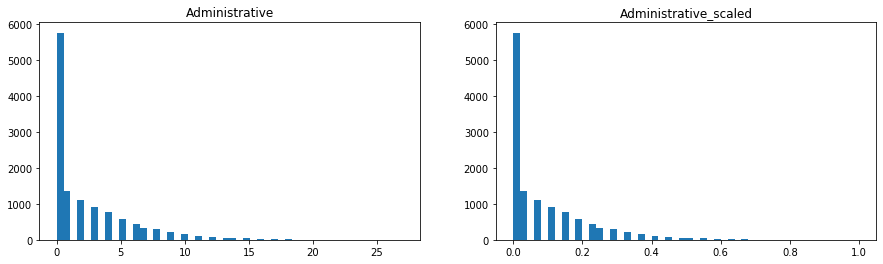

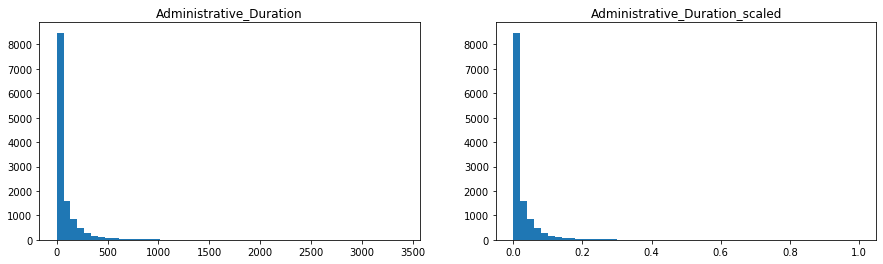

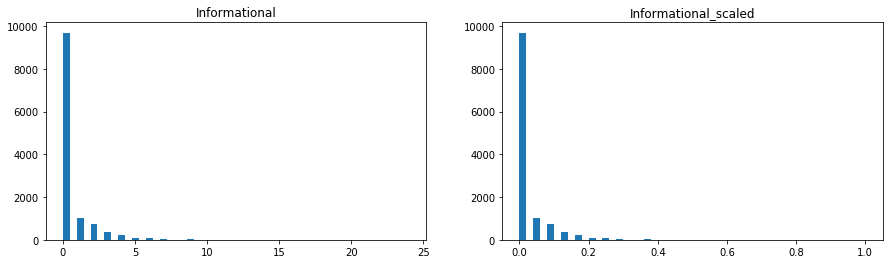

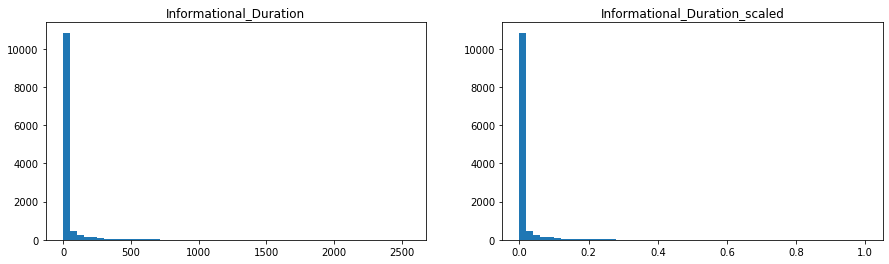

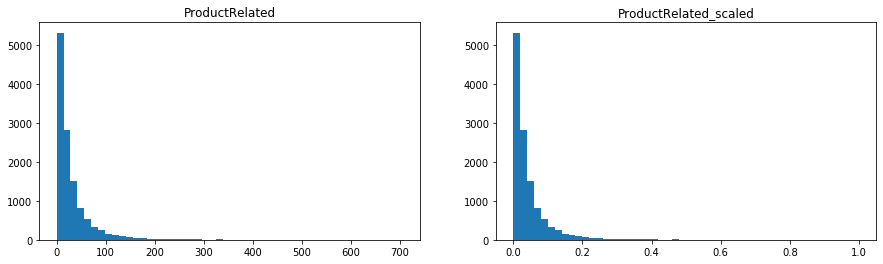

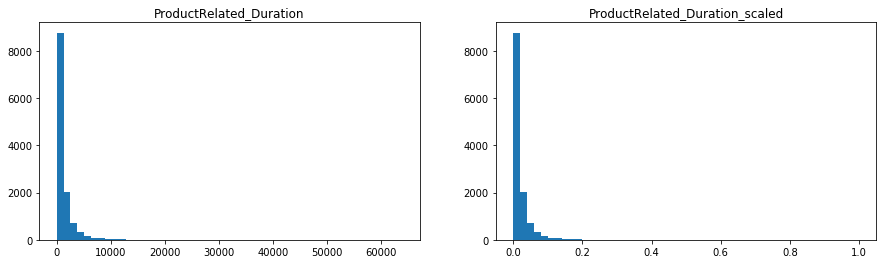

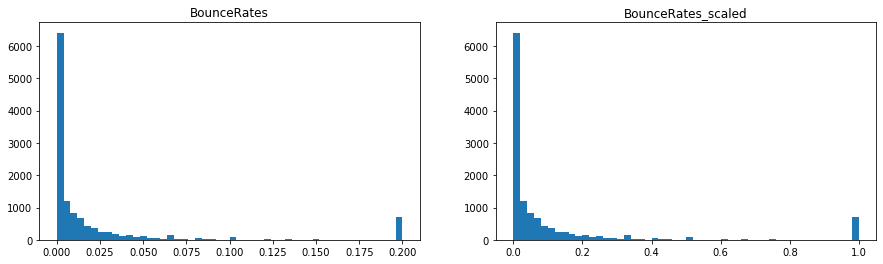

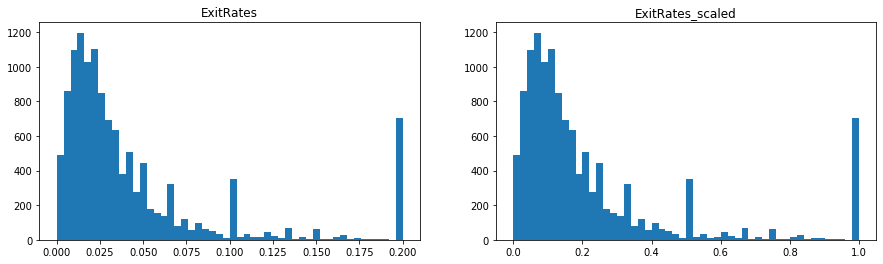

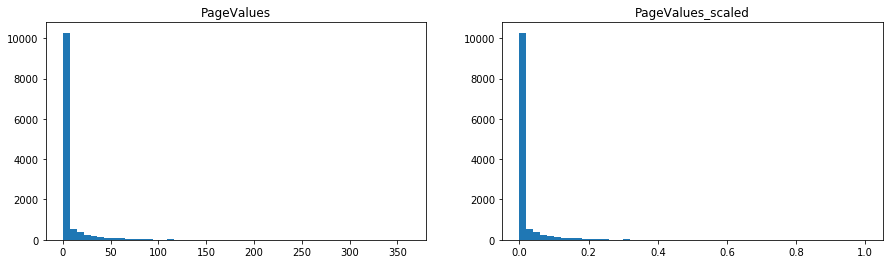

In [150]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols: 
    fig, ax = plt.subplots(1, 2, figsize=(15,4))
    ax[0].hist(data[col], 50)
    ax[1].hist(data_scale[col], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col+'_scaled')
    plt.show()

**Видим, что распределения сохранились, поэтому масштабируем данные.**



In [151]:
data[scale_cols] = sc1.fit_transform(data[scale_cols])
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.000294,0.0,0.000392,0.001418,0.000016,1.00,1.00,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.000294,0.0,0.000392,0.002837,0.001016,0.00,0.50,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.000000,0.0,0.000000,0.001418,0.000000,1.00,1.00,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.000294,0.0,0.000392,0.002837,0.000057,0.25,0.70,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.000294,0.0,0.000392,0.014184,0.009824,0.10,0.25,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Кодирование категориальных признаков

**В нашем датасете присутствуют категориальные признаки, часть из них уже закодированы с помощью  LabelEncoding (OperatingSystems,Browser,Region,TrafficType).  
Закодируем остальные.**


In [159]:
le=LabelEncoder()

In [160]:
data['Revenue']= le.fit_transform(data['Revenue'])

In [161]:
data['Month'] = le.fit_transform(data['Month'])

In [162]:
data['VisitorType']= le.fit_transform(data['VisitorType'])

In [163]:
data['Weekend']= le.fit_transform(data['Weekend'])

## Проведение корреляционного анализа данных

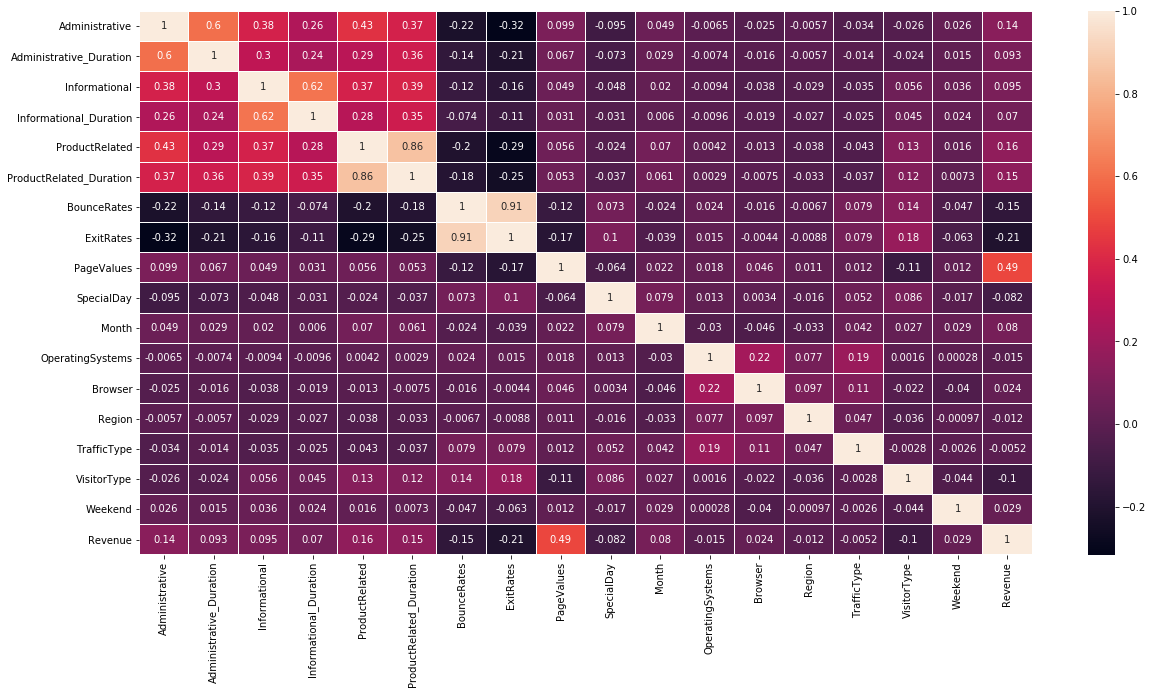

In [164]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,linewidths=.05);

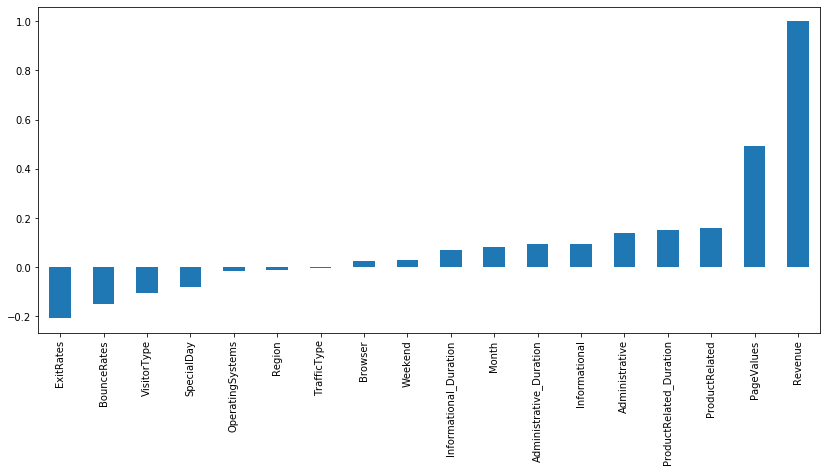

In [165]:
data.corr()['Revenue'].sort_values().plot(kind='bar')

Целевой признак классификации "Revenue" наиболее сильно коррелирует с "PageValues" (0.49)  
Признаки "BounceRates" и "ExitRates" is highly сильно коррелируют между собой (0.91), поэтому один из них мы использовать не будем.  
"ProductRelated_Duration" и ProductRelated тоже сильно коррелируют между собой (0.86).
  
INSIGHT: First-sight Attractiveness & Longer Page Viewing Morelikely Leads to Revenue


Удалим коррелирующие признаки.

In [166]:
data.drop(['ProductRelated_Duration', 'ExitRates'], axis = 1, inplace = True)

## В качестве метрик для решения задачи классификации будем использовать:
* Метрика accuracy
* Метрика precision
* Метрика recall (полнота)
* Метрика F1-мера
* Метрика ROC AUC
* Матрица ошибок или Confusion Matrix

## Для решения задачи классификации будем использовать следующие модели:

* Логистическая регрессия
* Метод ближайших соседей
* Машина опорных векторов
* Решающее дерево
* Случайный лес
* Градиентный бустинг

In [167]:
x = data.drop(['Revenue'], axis = 1)
y = data['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (12316, 15)
Shape of y: (12316,)


## Формирование обучающей и тестовой выборок

In [168]:
# splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [169]:
#test=SelectKBest(score_func=chi2,k=15)
#fit=test.fit(x,y)
#for i in range(15):
#    print((fit.scores_[i], x.columns[i]))

In [170]:
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure(figsize=(6,5))
    
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [171]:
# Модели
clas_models = {'LogR': LogisticRegression(max_iter=2000), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [172]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

In [173]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

## Baseline

In [174]:
def clas_train_model(model_name, model,clasMetricLogger):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print()
    print()
    print(model)
    print()
    print('accuracy={}, precision={}, recall={}, f1={}, roc_auc={}'.format(round(accuracy, 3), round(precision, 3),\
                                                                           round(recall, 3),round(f1, 3),round(roc_auc, 3)))
    
    clasMetricLogger.add('accuracy', model_name, accuracy)
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)
   
    plt.rcParams['figure.figsize'] = (6.0, 4.0)
    plot_confusion_matrix(model, x_test, y_test, display_labels=['0','1'], cmap=plt.cm.Blues, normalize='true')
    
    draw_roc_curve(y_test, y_pred, pos_label=1, average='micro')
    print('---------------------------------------------------------------------------')
    print()




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy=0.878, precision=0.792, recall=0.274, f1=0.407, roc_auc=0.631


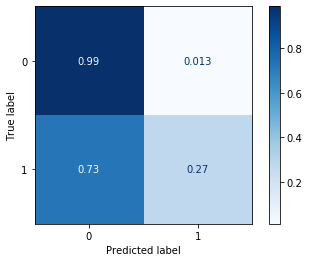

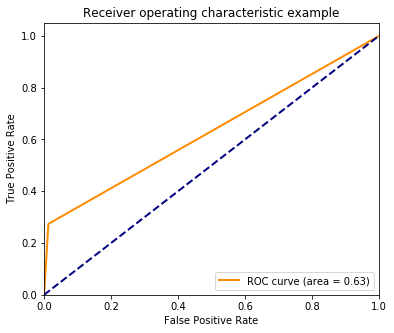

---------------------------------------------------------------------------



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

accuracy=0.846, precision=0.487, recall=0.154, f1=0.234, roc_auc=0.563


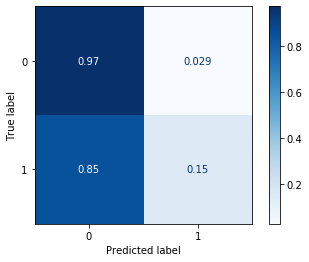

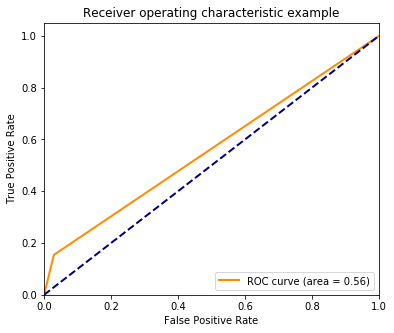

---------------------------------------------------------------------------



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

accuracy=0.847, precision=0.0, recall=0.0, f1=0.0, roc_auc=0.5


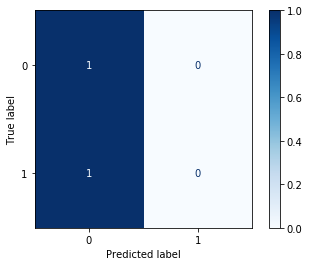

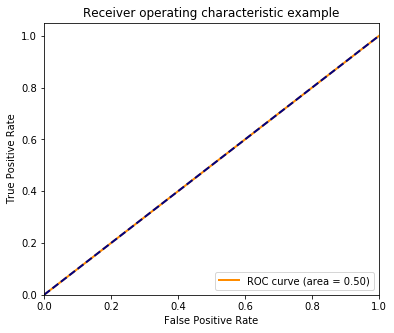

---------------------------------------------------------------------------



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

accuracy=0.861, precision=0.546, recall=0.537, f1=0.542, roc_auc=0.728


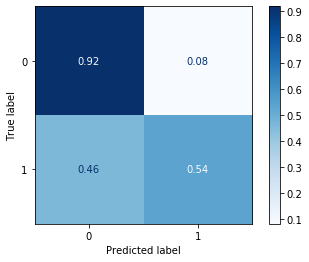

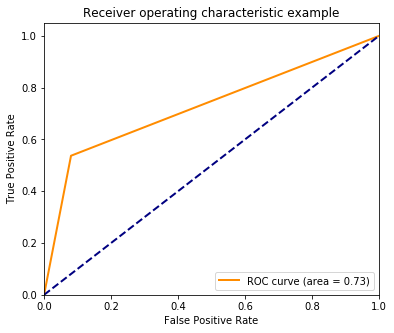

---------------------------------------------------------------------------



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

accuracy=0.897, precision=0.711, recall=0.543, f1=0.615, roc_auc=0.751


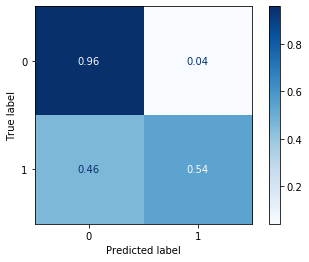

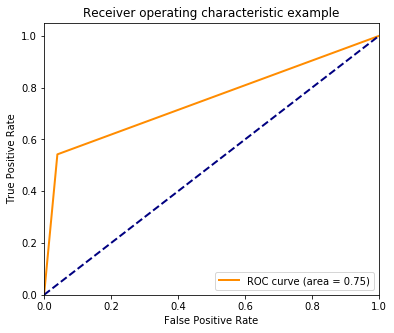

---------------------------------------------------------------------------



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

accuracy=0.903, precision=0.724, recall=0.585, f1=0.647, roc_auc=0.772


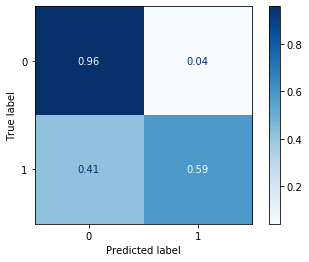

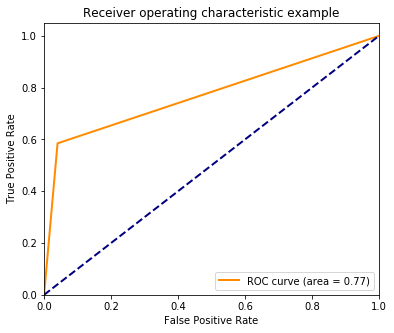

---------------------------------------------------------------------------



In [175]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

## Подбор гиперпараметров

In [176]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [177]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        x, y, scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.05979109, 0.0588429 , 0.04687405]),
 'score_time': array([0.24035788, 0.26033616, 0.21841645]),
 'test_precision': array([0.78290298, 0.76886511, 0.77378369]),
 'train_precision': array([0.9043993 , 0.90249838, 0.90826085]),
 'test_recall': array([0.84461763, 0.80876979, 0.66577345]),
 'train_recall': array([0.89220463, 0.889782  , 0.89708927]),
 'test_f1': array([0.77711101, 0.7847085 , 0.70572519]),
 'train_f1': array([0.86668415, 0.8627264 , 0.87445106])}

### KNeighborsClassifier

In [178]:
n_range = np.array(range(5,130,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
          70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125])}]

In [179]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [180]:
clf_gs.cv_results_

{'mean_fit_time': array([0.05165176, 0.05364857, 0.04946771, 0.05166011, 0.05046816,
        0.05146084, 0.05126286, 0.05086355, 0.04985948, 0.0510695 ,
        0.05126338, 0.04987216, 0.05207295, 0.05266447, 0.05046544,
        0.05227413, 0.053654  , 0.05306296, 0.05405288, 0.05524378,
        0.05744319, 0.05184693, 0.05207238, 0.05545549, 0.06103034]),
 'std_fit_time': array([0.00229908, 0.00116942, 0.00162074, 0.00158099, 0.00080238,
        0.00079834, 0.00100655, 0.00141054, 0.00109244, 0.000746  ,
        0.00079594, 0.00126119, 0.00113976, 0.00270643, 0.00174089,
        0.00134474, 0.00414123, 0.00359279, 0.00452204, 0.00255902,
        0.00401397, 0.00413863, 0.0023077 , 0.00590608, 0.00683932]),
 'mean_score_time': array([0.12606292, 0.14382982, 0.14779944, 0.15857897, 0.16436396,
        0.17333155, 0.18291712, 0.18670235, 0.19488487, 0.20165367,
        0.20604291, 0.2084444 , 0.22258525, 0.22239928, 0.22699285,
        0.23855443, 0.25332561, 0.25910225, 0.26948867, 0.28

In [181]:
# Лучшая модель
clf_gs.best_estimator_


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [182]:
# Лучшее значение метрики
clf_gs.best_score_

0.8453106593833942

In [183]:
# Лучшее значение параметров
clf_gs.best_params_


{'n_neighbors': 35}

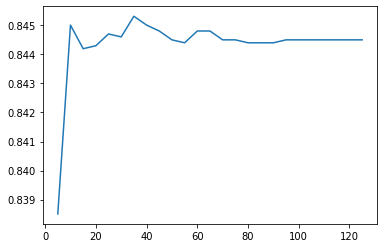

In [184]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [185]:
clas_models_grid = {'KNN_35':clf_gs.best_estimator_}

### DecisionTreeClassifier

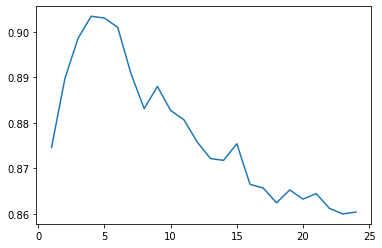

In [186]:
scores=[]
for i in range(1,25):
  tree=DecisionTreeClassifier(max_depth = i) 
  tree.fit(x_train, y_train) 
  scores.append(tree.score(x_test,y_test)) 
plt.plot(range(1,25),scores) 
plt.show()

In [187]:
tree=DecisionTreeClassifier(max_depth =4) 
tree.fit(x_train, y_train) 
y_pred = tree.predict(x_test) 
classification_report(y_test, y_pred, output_dict = True)

{'0': {'precision': 0.9282407407407407,
  'recall': 0.9602490421455939,
  'f1-score': 0.9439736346516008,
  'support': 2088},
 '1': {'precision': 0.7269736842105263,
  'recall': 0.5877659574468085,
  'f1-score': 0.65,
  'support': 376},
 'accuracy': 0.9034090909090909,
 'macro avg': {'precision': 0.8276072124756335,
  'recall': 0.7740074997962012,
  'f1-score': 0.7969868173258003,
  'support': 2464},
 'weighted avg': {'precision': 0.8975279106858054,
  'recall': 0.9034090909090909,
  'f1-score': 0.8991140215716487,
  'support': 2464}}

In [188]:
clas_models_grid['Tree_5']=DecisionTreeClassifier(max_depth =4)

In [189]:
# dt-grid
dt_grid = {'criterion':['gini','entropy'],
           'max_features':['auto','sqrt','log2'],
           'splitter':['best','random'],
           'max_depth':[2,4,6,8,10,12,14,16]}

In [190]:
# Randomized Search CV-DT
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                   param_distributions=dt_grid,
                   cv=5,
                   n_iter=20,
                   verbose=2)

# Fitting model
rs_dt.fit(x_train,y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] splitter=random, max_features=auto, max_depth=12, criterion=entropy 
[CV]  splitter=random, max_features=auto, max_depth=12, criterion=entropy, total=   0.0s
[CV] splitter=random, max_features=auto, max_depth=12, criterion=entropy 
[CV]  splitter=random, max_features=auto, max_depth=12, criterion=entropy, total=   0.0s
[CV] splitter=random, max_features=auto, max_depth=12, criterion=entropy 
[CV]  splitter=random, max_features=auto, max_depth=12, criterion=entropy, total=   0.0s
[CV] splitter=random, max_features=auto, max_depth=12, criterion=entropy 
[CV]  splitter=random, max_features=auto, max_depth=12, criterion=entropy, total=   0.0s
[CV] splitter=random, max_features=auto, max_depth=12, criterion=entropy 
[CV]  splitter=random, max_features=auto, max_depth=12, criterion=entropy, total=   0.0s
[CV] splitter=random, max_features=auto, max_depth=10, criterion=gini 
[CV]  splitter=random, max_features=auto, max_depth=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  splitter=best, max_features=sqrt, max_depth=2, criterion=gini, total=   0.0s
[CV] splitter=best, max_features=sqrt, max_depth=2, criterion=gini ...
[CV]  splitter=best, max_features=sqrt, max_depth=2, criterion=gini, total=   0.0s
[CV] splitter=random, max_features=auto, max_depth=2, criterion=gini .
[CV]  splitter=random, max_features=auto, max_depth=2, criterion=gini, total=   0.0s
[CV] splitter=random, max_features=auto, max_depth=2, criterion=gini .
[CV]  splitter=random, max_features=auto, max_depth=2, criterion=gini, total=   0.0s
[CV] splitter=random, max_features=auto, max_depth=2, criterion=gini .
[CV]  splitter=random, max_features=auto, max_depth=2, criterion=gini, total=   0.0s
[CV] splitter=random, max_features=auto, max_depth=2, criterion=gini .
[CV]  splitter=random, max_features=auto, max_depth=2, criterion=gini, total=   0.0s
[CV] splitter=random, max_features=auto, max_depth=2, criterion=gini .
[CV]  splitter=random, max_features=auto, max_depth=2, criterion=gin

[CV] splitter=best, max_features=auto, max_depth=10, criterion=entropy 
[CV]  splitter=best, max_features=auto, max_depth=10, criterion=entropy, total=   0.0s
[CV] splitter=best, max_features=auto, max_depth=10, criterion=entropy 
[CV]  splitter=best, max_features=auto, max_depth=10, criterion=entropy, total=   0.0s
[CV] splitter=best, max_features=auto, max_depth=10, criterion=entropy 
[CV]  splitter=best, max_features=auto, max_depth=10, criterion=entropy, total=   0.0s
[CV] splitter=random, max_features=log2, max_depth=2, criterion=entropy 
[CV]  splitter=random, max_features=log2, max_depth=2, criterion=entropy, total=   0.0s
[CV] splitter=random, max_features=log2, max_depth=2, criterion=entropy 
[CV]  splitter=random, max_features=log2, max_depth=2, criterion=entropy, total=   0.0s
[CV] splitter=random, max_features=log2, max_depth=2, criterion=entropy 
[CV]  splitter=random, max_features=log2, max_depth=2, criterion=entropy, total=   0.0s
[CV] splitter=random, max_features=log2,

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


In [191]:
rs_dt.best_params_

{'splitter': 'random',
 'max_features': 'log2',
 'max_depth': 12,
 'criterion': 'gini'}

In [192]:
clas_models_grid['Tree_16']=DecisionTreeClassifier(splitter= 'random', max_features= 'sqrt', max_depth= 16,criterion= 'gini')

### RandomForestClassifier

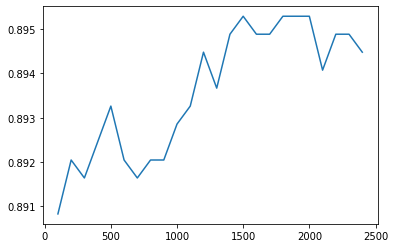

In [193]:
scores=[]
for i in (np.arange(100,2500,100)):
  classifier = RandomForestClassifier(n_estimators =i, max_depth=5, random_state =101) 
  classifier.fit(x_train, y_train) 
  scores.append(classifier.score(x_test,y_test)) 
plt.plot(np.arange(100,2500,100),scores) 
plt.show()

In [194]:
clas_models_grid['RF_2000']=RandomForestClassifier(n_estimators =2000, max_depth=5, random_state =101)

In [195]:
# rf grid
rf_grid = {'criterion':['gini','entropy'],
           'n_estimators':np.arange(10, 2000, 50),
           'max_features':['auto','sqrt','log2'],
           'max_depth':np.arange(15),
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [196]:
# Randomized Search CV-RF
rs_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                   param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                   verbose=2)

# Fitting model
rs_rf.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=1610, min_samples_split=12, min_samples_leaf=13, max_features=auto, max_depth=6, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1610, min_samples_split=12, min_samples_leaf=13, max_features=auto, max_depth=6, criterion=gini, total=   7.8s
[CV] n_estimators=1610, min_samples_split=12, min_samples_leaf=13, max_features=auto, max_depth=6, criterion=gini 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV]  n_estimators=1610, min_samples_split=12, min_samples_leaf=13, max_features=auto, max_depth=6, criterion=gini, total=   7.3s
[CV] n_estimators=1610, min_samples_split=12, min_samples_leaf=13, max_features=auto, max_depth=6, criterion=gini 
[CV]  n_estimators=1610, min_samples_split=12, min_samples_leaf=13, max_features=auto, max_depth=6, criterion=gini, total=   7.1s
[CV] n_estimators=1610, min_samples_split=12, min_samples_leaf=13, max_features=auto, max_depth=6, criterion=gini 
[CV]  n_estimators=1610, min_samples_split=12, min_samples_leaf=13, max_features=auto, max_depth=6, criterion=gini, total=   6.9s
[CV] n_estimators=1610, min_samples_split=12, min_samples_leaf=13, max_features=auto, max_depth=6, criterion=gini 
[CV]  n_estimators=1610, min_samples_split=12, min_samples_leaf=13, max_features=auto, max_depth=6, criterion=gini, total=   6.9s
[CV] n_estimators=660, min_samples_split=2, min_samples_leaf=13, max_features=log2, max_depth=13, criterion=entropy 
[CV]  n_estimators

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=310, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=0, criterion=gini, total=   0.1s
[CV] n_estimators=310, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=0, criterion=gini 
[CV]  n_estimators=310, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=0, criterion=gini, total=   0.1s
[CV] n_estimators=310, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=0, criterion=gini 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=310, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=0, criterion=gini, total=   0.1s
[CV] n_estimators=310, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=0, criterion=gini 
[CV]  n_estimators=310, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=0, criterion=gini, total=   0.1s
[CV] n_estimators=1410, min_samples_split=4, min_samples_leaf=15, max_features=log2, max_depth=13, criterion=entropy 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1410, min_samples_split=4, min_samples_leaf=15, max_features=log2, max_depth=13, criterion=entropy, total=   8.7s
[CV] n_estimators=1410, min_samples_split=4, min_samples_leaf=15, max_features=log2, max_depth=13, criterion=entropy 
[CV]  n_estimators=1410, min_samples_split=4, min_samples_leaf=15, max_features=log2, max_depth=13, criterion=entropy, total=   8.7s
[CV] n_estimators=1410, min_samples_split=4, min_samples_leaf=15, max_features=log2, max_depth=13, criterion=entropy 
[CV]  n_estimators=1410, min_samples_split=4, min_samples_leaf=15, max_features=log2, max_depth=13, criterion=entropy, total=   8.8s
[CV] n_estimators=1410, min_samples_split=4, min_samples_leaf=15, max_features=log2, max_depth=13, criterion=entropy 
[CV]  n_estimators=1410, min_samples_split=4, min_samples_leaf=15, max_features=log2, max_depth=13, criterion=entropy, total=   8.7s
[CV] n_estimators=1410, min_samples_split=4, min_samples_leaf=15, max_features=log2, max_depth=13, criterion=entro

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1510, min_samples_split=4, min_samples_leaf=13, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.6s
[CV] n_estimators=1510, min_samples_split=4, min_samples_leaf=13, max_features=sqrt, max_depth=0, criterion=entropy 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1510, min_samples_split=4, min_samples_leaf=13, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.6s
[CV] n_estimators=1510, min_samples_split=4, min_samples_leaf=13, max_features=sqrt, max_depth=0, criterion=entropy 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1510, min_samples_split=4, min_samples_leaf=13, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.6s
[CV] n_estimators=1510, min_samples_split=4, min_samples_leaf=13, max_features=sqrt, max_depth=0, criterion=entropy 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1510, min_samples_split=4, min_samples_leaf=13, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.6s
[CV] n_estimators=1510, min_samples_split=4, min_samples_leaf=13, max_features=sqrt, max_depth=0, criterion=entropy 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1510, min_samples_split=4, min_samples_leaf=13, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.6s
[CV] n_estimators=560, min_samples_split=16, min_samples_leaf=5, max_features=sqrt, max_depth=1, criterion=entropy 
[CV]  n_estimators=560, min_samples_split=16, min_samples_leaf=5, max_features=sqrt, max_depth=1, criterion=entropy, total=   1.3s
[CV] n_estimators=560, min_samples_split=16, min_samples_leaf=5, max_features=sqrt, max_depth=1, criterion=entropy 
[CV]  n_estimators=560, min_samples_split=16, min_samples_leaf=5, max_features=sqrt, max_depth=1, criterion=entropy, total=   1.4s
[CV] n_estimators=560, min_samples_split=16, min_samples_leaf=5, max_features=sqrt, max_depth=1, criterion=entropy 
[CV]  n_estimators=560, min_samples_split=16, min_samples_leaf=5, max_features=sqrt, max_depth=1, criterion=entropy, total=   1.4s
[CV] n_estimators=560, min_samples_split=16, min_samples_leaf=5, max_features=sqrt, max_depth=1, criterion=entropy 
[CV]  n_est

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1660, min_samples_split=8, min_samples_leaf=19, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.6s
[CV] n_estimators=1660, min_samples_split=8, min_samples_leaf=19, max_features=sqrt, max_depth=0, criterion=entropy 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1660, min_samples_split=8, min_samples_leaf=19, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.6s
[CV] n_estimators=1660, min_samples_split=8, min_samples_leaf=19, max_features=sqrt, max_depth=0, criterion=entropy 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1660, min_samples_split=8, min_samples_leaf=19, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.6s
[CV] n_estimators=1660, min_samples_split=8, min_samples_leaf=19, max_features=sqrt, max_depth=0, criterion=entropy 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1660, min_samples_split=8, min_samples_leaf=19, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.6s
[CV] n_estimators=1660, min_samples_split=8, min_samples_leaf=19, max_features=sqrt, max_depth=0, criterion=entropy 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1660, min_samples_split=8, min_samples_leaf=19, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.6s
[CV] n_estimators=1760, min_samples_split=16, min_samples_leaf=15, max_features=sqrt, max_depth=0, criterion=entropy 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1760, min_samples_split=16, min_samples_leaf=15, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.7s
[CV] n_estimators=1760, min_samples_split=16, min_samples_leaf=15, max_features=sqrt, max_depth=0, criterion=entropy 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1760, min_samples_split=16, min_samples_leaf=15, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.7s
[CV] n_estimators=1760, min_samples_split=16, min_samples_leaf=15, max_features=sqrt, max_depth=0, criterion=entropy 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1760, min_samples_split=16, min_samples_leaf=15, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.6s
[CV] n_estimators=1760, min_samples_split=16, min_samples_leaf=15, max_features=sqrt, max_depth=0, criterion=entropy 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1760, min_samples_split=16, min_samples_leaf=15, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.6s
[CV] n_estimators=1760, min_samples_split=16, min_samples_leaf=15, max_features=sqrt, max_depth=0, criterion=entropy 


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)


[CV]  n_estimators=1760, min_samples_split=16, min_samples_leaf=15, max_features=sqrt, max_depth=0, criterion=entropy, total=   0.7s
[CV] n_estimators=1510, min_samples_split=4, min_samples_leaf=3, max_features=log2, max_depth=7, criterion=gini 
[CV]  n_estimators=1510, min_samples_split=4, min_samples_leaf=3, max_features=log2, max_depth=7, criterion=gini, total=   7.1s
[CV] n_estimators=1510, min_samples_split=4, min_samples_leaf=3, max_features=log2, max_depth=7, criterion=gini 
[CV]  n_estimators=1510, min_samples_split=4, min_samples_leaf=3, max_features=log2, max_depth=7, criterion=gini, total=   7.1s
[CV] n_estimators=1510, min_samples_split=4, min_samples_leaf=3, max_features=log2, max_depth=7, criterion=gini 
[CV]  n_estimators=1510, min_samples_split=4, min_samples_leaf=3, max_features=log2, max_depth=7, criterion=gini, total=   7.2s
[CV] n_estimators=1510, min_samples_split=4, min_samples_leaf=3, max_features=log2, max_depth=7, criterion=gini 
[CV]  n_estimators=1510, min_sa

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.5min finished


In [197]:
rs_rf.best_params_


{'n_estimators': 660,
 'min_samples_split': 2,
 'min_samples_leaf': 13,
 'max_features': 'log2',
 'max_depth': 13,
 'criterion': 'entropy'}

In [198]:
clas_models_grid['RF_']=RandomForestClassifier(n_estimators =2000, max_depth=5, random_state =101)

### SVM

In [199]:
#scores=[]
#for i in (np.arange(0,1,0.1)):
#  classifier = SVC(kernel = 'linear', C = i)
#  classifier.fit(x_train,y_train) 
#  scores.append(classifier.score(x_test,y_test)) 
#plt.plot(np.arange(0,1,0.1),scores) 
#plt.show()



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

accuracy=0.849, precision=0.714, recall=0.013, f1=0.026, roc_auc=0.506


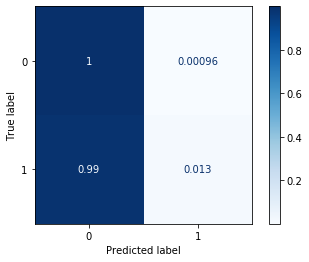

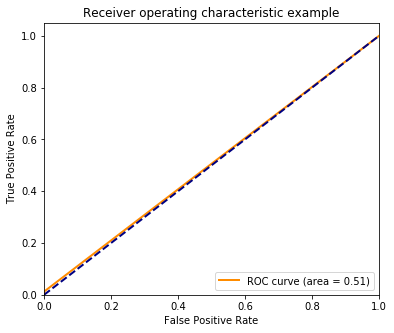

---------------------------------------------------------------------------



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

accuracy=0.903, precision=0.727, recall=0.588, f1=0.65, roc_auc=0.774


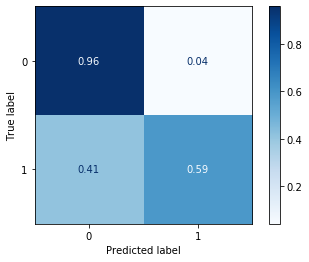

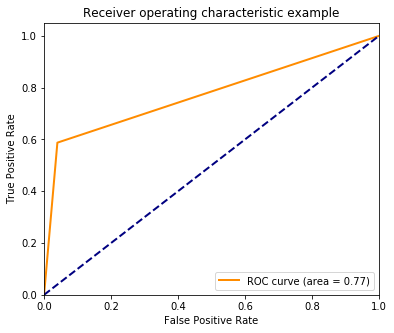

---------------------------------------------------------------------------



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

accuracy=0.857, precision=0.576, recall=0.242, f1=0.341, roc_auc=0.605


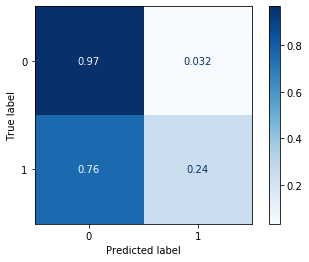

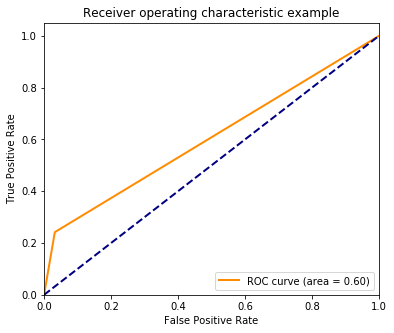

---------------------------------------------------------------------------



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

accuracy=0.895, precision=0.878, recall=0.364, f1=0.515, roc_auc=0.678


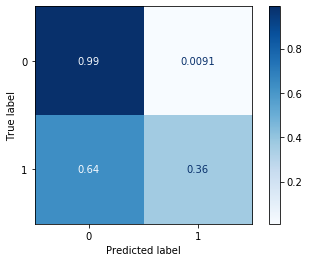

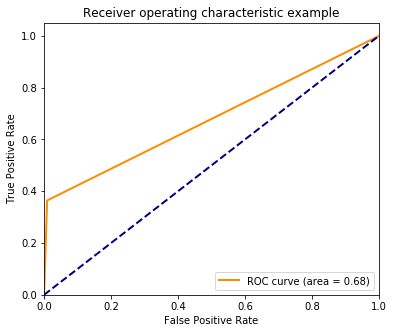

---------------------------------------------------------------------------



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

accuracy=0.895, precision=0.878, recall=0.364, f1=0.515, roc_auc=0.678


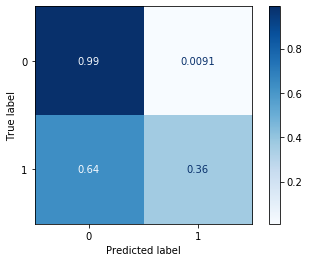

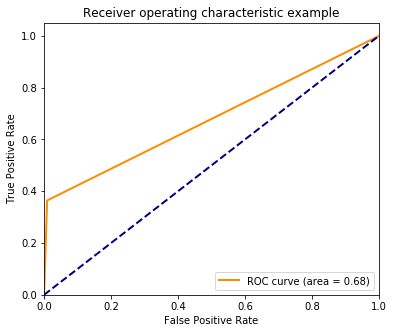

---------------------------------------------------------------------------



In [200]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

##  Решение задачи классификации

In [201]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], dtype=object)

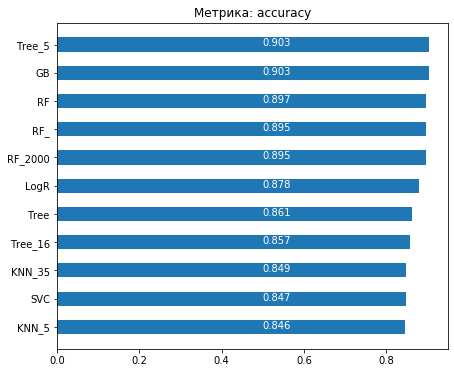

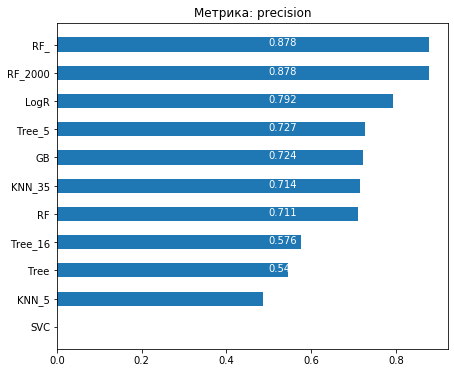

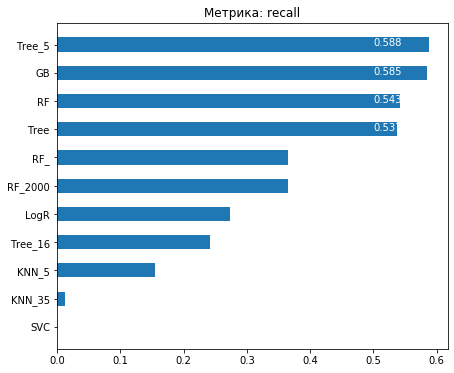

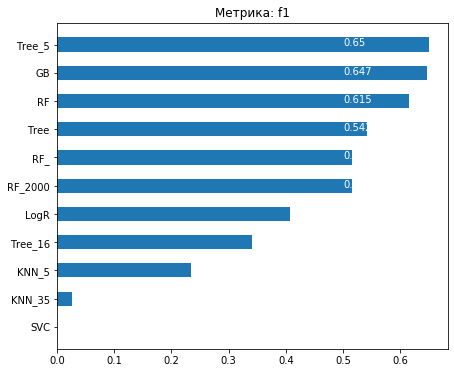

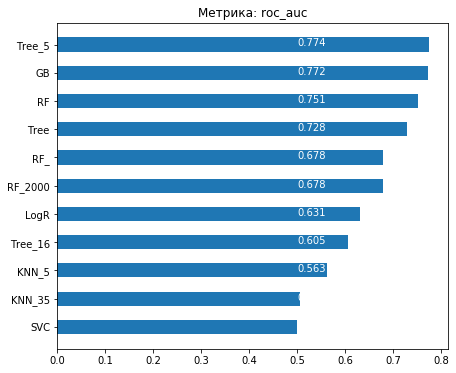

In [202]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))